Machine Learning - Exercise 04 - Dimensionaity Reduction

Sinh viên: Nguyễn Hoàng Lộc

MSSV: 1511849

# DATA PREPARATION

In [0]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1511849)
import math
from copy import deepcopy as clone
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [0]:
N0 = 30
N1 = 25
N = N0 + N1
X0 = np.random.multivariate_normal(mean = [0, 8],
                                   cov = [[5, 2], [2, 5]],
                                   size = N0)
                                  
X1 = np.random.multivariate_normal(mean = [7, 0],
                                   cov = [[4, 2], [2, 4]],
                                   size = N1)

Dữ liệu random để thực hiện thu giảm chiều:


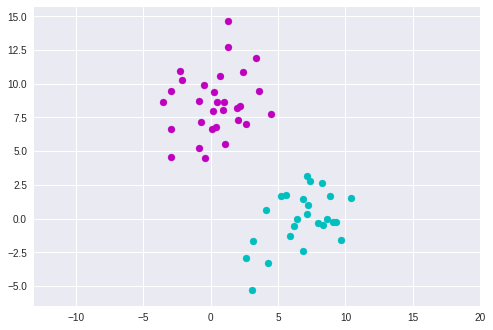

In [158]:
plt.scatter(X0[:,0], X0[:,1], color = 'm')
plt.scatter(X1[:,0], X1[:,1], color = 'c')
print("Dữ liệu random để thực hiện thu giảm chiều:")
plt.axis('equal')
plt.show()

In [0]:
#Hàm util dùng để visualize sau khi đã giảm chiều
def rotate(x,y,xo,yo,theta): 
  xr=math.cos(theta)*(x-xo)-math.sin(theta)*(y-yo)   + xo 
  yr=math.sin(theta)*(x-xo)+math.cos(theta)*(y-yo)  + yo
  return xr,yr

# LINEAR DISCRIMINANT ANALYSIS

In [148]:
#Tính các giá trị kì vọng
m0 = np.mean(X0.T, axis = 1, keepdims = True)
m1 = np.mean(X1.T, axis = 1, keepdims = True)
print("m0: \n", m0)
print("m1: \n", m1)

m0: 
 [[0.33445925]
 [8.54425961]]
m1: 
 [[ 6.78039119]
 [-0.07831667]]


In [149]:
#Tính S_B
a = (m0 - m1)
print('m0 - m1: \n', a)
S_B = np.dot(a, a.T)
print('S_B: \n', S_B)

m0 - m1: 
 [[-6.44593194]
 [ 8.62257628]]
S_B: 
 [[ 41.55003857 -55.58053984]
 [-55.58053984  74.3488217 ]]


In [150]:
#Tính S_W
XM0 = X0.T - np.repeat(m0, N0, axis = 1)
XM1 = X1.T - np.repeat(m1, N1, axis = 1)
print('XM0: \n', XM0)
print('XM1: \n', XM1)
S_W = np.dot(XM0, XM0.T) + np.dot(XM1, XM1.T)
print('S_W: \n', S_W)

XM0: 
 [[-0.14640816 -3.29089379  2.28376803 -0.78430817 -1.22858082  3.01966924
  -3.87204268  0.7434827   0.55928815 -0.84218364 -2.46848028  0.95106864
   3.24801499 -0.23390148 -0.09809582  2.03704464  1.63679014  0.10952372
   0.98281542 -2.63881282 -1.01970472  0.36122108 -3.2397164   0.04942878
  -3.27047521 -1.1650032   4.12020165  1.81834406  1.72878351  0.64916243]
 [-0.5890416  -1.90557693 -1.52755106 -4.06396283 -3.29364425  3.32937985
   0.08823204 -3.03730742 -0.51516838  1.38104252  1.70274185  4.19275049
   0.90882934 -1.8792264   0.82079327  2.33500121 -0.34237505  0.10201472
   6.13988241  2.3700422  -1.41825017  2.00034826 -3.98952637 -1.76633583
   0.92725938  0.18831901 -0.81965389 -0.18519723 -1.24740247  0.09358331]]
XM1: 
 [[ 0.55916593  0.36536439  2.52834969  1.57433525  1.15992322 -0.87272073
  -0.62955448  1.49329162 -3.73105405 -2.55973232 -3.61163214  0.43555344
   0.10009968 -2.66006131  2.05616447  3.61247851  0.35636061  0.06628522
   2.26171503  2.8814

In [151]:
_, W = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
w = W[:,1]
print(w)

[ 0.681658   -0.73167095]


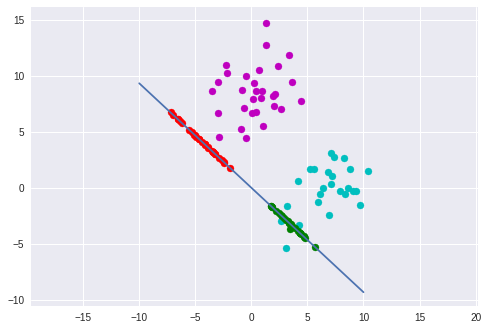

In [157]:
#Visualize lại kết quả sau khi giảm chiều
fig = plt.figure()
ax = plt.axes()
x = np.linspace(-10, 10, 100)
ax.plot(x, x*w[0]/w[1]);

plt.scatter(w[0]*5, w[1]*5, color = 'g')
plt.scatter(X0[:,0], X0[:,1], color = 'm')
plt.scatter(X1[:,0], X1[:,1], color = 'c')

X0_new_1D = np.dot(w, X0.T)
X1_new_1D = np.dot(w, X1.T)

theta = np.arctan(w[0]/w[1]) 

X0_new_2D = [[],[]]
for x in X0_new_1D:
  xt, yt = rotate(x, 0, 0, 0, theta) 
  X0_new_2D[0].append(xt)
  X0_new_2D[1].append(yt)

X1_new_2D = [[],[]]

for x in X1_new_1D:
  xt, yt = rotate(x, 0, 0, 0, theta) 
  X1_new_2D[0].append(xt)
  X1_new_2D[1].append(yt)
  
plt.scatter(X0_new_2D[0], X0_new_2D[1], color = 'r')
plt.scatter(X1_new_2D[0], X1_new_2D[1], color = 'g')

plt.axis('equal')
plt.show()

#Kiểm tra bằng thư viện sklearn

In [152]:
#Test trên thư viện sklearn
X = np.concatenate((X0, X1))
y = np.array([0]*N0 + [1]*N1)
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)

print(clf.coef_/np.linalg.norm(clf.coef_))

[[ 0.681658   -0.73167095]]
